<a href="https://colab.research.google.com/github/Hamza1122/Assignment_ML/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing relevant libraries**

In [126]:
import statsmodels.api as sm
import pandas as pd  
import numpy as np
from patsy import dmatrices
import keras
from keras_drop_connect import DropConnect
from regularization.layers.shakeout import ShakeoutConv2D, ShakeoutDense
from keras.models import Sequential
from keras.layers import Flatten


**Importing my data**

In [128]:
# loading the training dataset  
df = pd.read_csv('filtered.csv') 
df = df.replace({np.nan:-1})
df.head()

,Site,EXAMbySANE,YearKitCollected,KITbroughtTOcrimelab,KITlengthofSubmissionTime,Age,UnderAge18,Gender,ExamDeclined,Noninterview,Timebetweenassaultandexaminhours,Race,Raceother,PriorHxofSAover14,PriorHxofSAunder14,Student,SchoolName,Military,MilitaryBranchName,Pain,PainLevel,PainLocation1,PainLocation2,PainLocation3,PainLocation4,PainTreatment,PermanentAddress,AddressIfnotPermanent,CurrentPhysicalmedprob,Currentmedprobtext,MedProbChronic,MedProbInfection,MedProbBlood,MedProbCardiac,MedProbEar,MedProbEndocrine,MedProbEye,MedProbGI,MedProbGU,MedProbGYN,...,LGIglanspenis,LGIpenileshaft,LGImaleURETHRALmeatus,LGIscrotum,LGItestes,LGImaleanus,LGImalerectum,TGIlaceration,TGIecchymosis,TGIabrasion,TGIredness,TGIswelling,TGIbruise,TGIpetechiae,TGIincision,TGIavulsion,TGIdiscoloredmark,TGIpuncturewound,ToludineDYEuptake,HIVnPEP,Yscreen,NumberOFitemsTested,NumberItemsWITH3cutoff,ItemsAnalyzed1,ItemsAnalyzed2,ItemsAnalyzed3,ItemsAnalyzed4,ItemsAnalyzed5,ItemsAnalyzed6,ItemsAnalyzed7,ItemsAnalyzed8,ItemsAnalyzed9,ItemsAnalyzed10,TypesOFitemsTested,TimeBetweenCollectAndDNAext,TimeBetweenSubmissionANDtesting,NumberOfswabsDNAanalysis,SuspectStandardSubmitted,ConsensualPartnerStandardSubmitted,CODISNDISeligibleProfile
0,1,1,2,1,2,20-24,0,1,0,,0-5.9,1,,,,,,,,,,,,,,,,,1,Heartburn and pain in LLQ abdomen,1,0,0,0,0,0,0,1,0,0,...,3,3,3,3,3,3,3,1,0,1,1,1,0,0,0,0,0,0,1,0,,11,2,1,2,3,4,6,8,11,,,,3,12,5,9,1,0,1
1,4,1,6,1,1,14-17,1,1,0,0,12-23.9,1,,,,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,17,2,1,2,3,5,8,9,10,11,,,5,9,8,7,1,0,1
2,1,1,8,1,1,30-39,0,1,0,0,0-5.9,3,,0,0,0,,0,,1,,1,2,5,,1,1,,1,pt has small uterus and never got her menstrua...,0,0,0,0,0,0,0,0,0,1,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,7,2,7,8,9,10,,,,,,,2,13,13,7,0,0,0
3,1,1,4,1,1,20-24,0,1,0,0,12-23.9,1,,0,1,,,,,,,,,,,,,,1,"Anemia, Asthma",1,0,1,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,1,1,0,0,0,0,0,0,0,0,1,0,,14,2,1,2,3,4,5,6,8,9,11,12,5,12,12,6,1,0,1
4,1,1,5,1,2,14-17,0,1,0,0,24-47.9,7,,0,0,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,,12,2,1,2,3,4,5,6,8,11,,,3,10,6,6,1,0,1


In [129]:
for col in df.columns: 
    print(col)

Site
EXAMbySANE
YearKitCollected
KITbroughtTOcrimelab
KITlengthofSubmissionTime
Age
UnderAge18
Gender
ExamDeclined
Noninterview
Timebetweenassaultandexaminhours
Race
Raceother
PriorHxofSAover14
PriorHxofSAunder14
Student
SchoolName
Military
MilitaryBranchName
Pain
PainLevel
PainLocation1
PainLocation2
PainLocation3
PainLocation4
PainTreatment
PermanentAddress
AddressIfnotPermanent
CurrentPhysicalmedprob
Currentmedprobtext
MedProbChronic
MedProbInfection
MedProbBlood
MedProbCardiac
MedProbEar
MedProbEndocrine
MedProbEye
MedProbGI
MedProbGU
MedProbGYN
MedProbImmune
MedProbMusculoskeletal
MedProbNeurological
MedProbOral
MedProbRenal
MedProbRespiratory
MedProbSkin
MedProbOther
MedProbOtherText
Medication
Medicationtext
PsychotropicMEDuse
PsychotropicSTIMULANTuse
PsychotropicANTIPSYCHOTICSatypical
PsychotropicANTIPSYCHOTICStypical
PsychotropicANTIANXIETY
PsychotropicANTIDEPRESSANTS
PsychotropicANTISEIZUREbipolar
PsychotropicADDICTIONmeds
PsychotropicSLEEPaid
PsychotropicOTHER
PolypharmacyPs

In [130]:
df[['CODISNDISeligibleProfile', 'Age']]

,CODISNDISeligibleProfile,Age
0,1,20-24
1,1,14-17
2,0,30-39
3,1,20-24
4,1,14-17
...,...,...
2234,1,20-24
2235,1,14-17
2236,1,20-24
2237,1,25-29


**Examine and Clean variables for use**

In [131]:
df = df.apply(pd.to_numeric, errors='ignore')

In [132]:
df

,Site,EXAMbySANE,YearKitCollected,KITbroughtTOcrimelab,KITlengthofSubmissionTime,Age,UnderAge18,Gender,ExamDeclined,Noninterview,Timebetweenassaultandexaminhours,Race,Raceother,PriorHxofSAover14,PriorHxofSAunder14,Student,SchoolName,Military,MilitaryBranchName,Pain,PainLevel,PainLocation1,PainLocation2,PainLocation3,PainLocation4,PainTreatment,PermanentAddress,AddressIfnotPermanent,CurrentPhysicalmedprob,Currentmedprobtext,MedProbChronic,MedProbInfection,MedProbBlood,MedProbCardiac,MedProbEar,MedProbEndocrine,MedProbEye,MedProbGI,MedProbGU,MedProbGYN,...,LGIglanspenis,LGIpenileshaft,LGImaleURETHRALmeatus,LGIscrotum,LGItestes,LGImaleanus,LGImalerectum,TGIlaceration,TGIecchymosis,TGIabrasion,TGIredness,TGIswelling,TGIbruise,TGIpetechiae,TGIincision,TGIavulsion,TGIdiscoloredmark,TGIpuncturewound,ToludineDYEuptake,HIVnPEP,Yscreen,NumberOFitemsTested,NumberItemsWITH3cutoff,ItemsAnalyzed1,ItemsAnalyzed2,ItemsAnalyzed3,ItemsAnalyzed4,ItemsAnalyzed5,ItemsAnalyzed6,ItemsAnalyzed7,ItemsAnalyzed8,ItemsAnalyzed9,ItemsAnalyzed10,TypesOFitemsTested,TimeBetweenCollectAndDNAext,TimeBetweenSubmissionANDtesting,NumberOfswabsDNAanalysis,SuspectStandardSubmitted,ConsensualPartnerStandardSubmitted,CODISNDISeligibleProfile
0,1,1,2,1,2,20-24,0,1,0,,0-5.9,1,,,,,,,,,,,,,,,,,1,Heartburn and pain in LLQ abdomen,1,0,0,0,0,0,0,1,0,0,...,3,3,3,3,3,3,3,1,0,1,1,1,0,0,0,0,0,0,1,0,,11,2,1,2,3,4,6,8,11,,,,3,12,5,9,1,0,1
1,4,1,6,1,1,14-17,1,1,0,0,12-23.9,1,,,,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,17,2,1,2,3,5,8,9,10,11,,,5,9,8,7,1,0,1
2,1,1,8,1,1,30-39,0,1,0,0,0-5.9,3,,0,0,0,,0,,1,,1,2,5,,1,1,,1,pt has small uterus and never got her menstrua...,0,0,0,0,0,0,0,0,0,1,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,7,2,7,8,9,10,,,,,,,2,13,13,7,0,0,0
3,1,1,4,1,1,20-24,0,1,0,0,12-23.9,1,,0,1,,,,,,,,,,,,,,1,"Anemia, Asthma",1,0,1,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,1,1,0,0,0,0,0,0,0,0,1,0,,14,2,1,2,3,4,5,6,8,9,11,12,5,12,12,6,1,0,1
4,1,1,5,1,2,14-17,0,1,0,0,24-47.9,7,,0,0,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,,12,2,1,2,3,4,5,6,8,11,,,3,10,6,6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,5,0,7,1,2,20-24,0,1,0,0,48+,1,,,,,,,,,,,,,,,,,1,ovarian cancer peridarditits,0,0,0,1,0,0,0,0,0,1,...,3,3,3,3,3,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,,3,1,2,3,4,,,,,,,,1,38,31,1,0,0,1
2235,5,0,7,1,2,14-17,1,1,0,0,12-23.9,1,,,,,,,,,,,,,,,,,0,"depresion, anxiety, bipolar",0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,1,0,,3,1,1,3,7,,,,,,,,1,22,21,1,0,0,1
2236,5,0,7,1,1,20-24,0,1,0,0,24-47.9,3,,,,,,,,1,0,6,4,2,7,,,,0,"depression, anxiety, Hep C",1,1,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,,3,1,1,3,4,,,,,,,,1,27,27,1,0,0,1
2237,5,0,8,1,2,25-29,0,1,0,0,12-23.9,1,,,,,,,,0,,,,,,,,,1,"TBI, anxiety, sinus infection",1,1,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,2,1,1,3,,,,,,,,,1,45,28,1,0,0,1


In [133]:
df = df.astype({'Site': int, 'EXAMbySANE': int, 'YearKitCollected': int, 'KITbroughtTOcrimelab': int, 'KITlengthofSubmissionTime': int, 'Age': str, 'UnderAge18': int, 'Gender': int, 'ExamDeclined': bool, 'Noninterview': bool, 'Timebetweenassaultandexaminhours': str, 'Race': int, 'Raceother': int, 'PriorHxofSAover14': bool, 'PriorHxofSAunder14': bool, 'Student': bool, 'SchoolName': str, 'Military': bool, 'MilitaryBranchName': str, 'Pain': bool, 'PainLevel': int, 'PainLocation1': int, 'PainLocation2': int, 'PainLocation3': int, 'PainLocation4': int, 'PainTreatment': bool}, errors='ignore') 

In [134]:
counts = df['Gender'].value_counts()

In [135]:
counts

1    2056
2     164
3      13
4       3
5       2
        1
Name: Gender, dtype: int64

In [136]:
#df = df.astype({'PermanentAddress': bool, 'AddressIfnotPermanent': str, 'CurrentPhysicalmedprob': bool, 'Currentmedprobtext': str, 'MedProbChronic': bool, 'MedProbInfection': bool, 'MedProbBlood': bool, 'MedProbCardiac': bool, 'MedProbEar': bool, 'MedProbEndocrine': bool, 'MedProbEye': bool, 'MedProbGI': bool, 'MedProbGU': bool, 'MedProbGYN': bool}, errors='ignore')

In [137]:
#df = df.astype({'CODISNDISeligibleProfile': int}, errors='ignore')

In [138]:
df['Age_cat'] = df['Age'].astype('category')

In [139]:
df['Age_cat']

0       20-24
1       14-17
2       30-39
3       20-24
4       14-17
        ...  
2234    20-24
2235    14-17
2236    20-24
2237    25-29
2238    18-19
Name: Age_cat, Length: 2239, dtype: category
Categories (7, object): [' ', '14-17', '18-19', '20-24', '25-29', '30-39', '40+']

In [140]:
df['Timebetweenassaultandexaminehours_cat'] = df['Timebetweenassaultandexaminhours'].astype('category')

In [141]:
df['Timebetweenassaultandexaminehours_cat']

0         0-5.9
1       12-23.9
2         0-5.9
3       12-23.9
4       24-47.9
         ...   
2234        48+
2235    12-23.9
2236    24-47.9
2237    12-23.9
2238        48+
Name: Timebetweenassaultandexaminehours_cat, Length: 2239, dtype: category
Categories (6, object): [' ', '0-5.9', '12-23.9', '24-47.9', '48+', '6-11.9']

**Run some models**

Simple logistic models

In [142]:
# first running a simple logistic regression
y, X = dmatrices('CODISNDISeligibleProfile ~ Gender + Age_cat', data=df, return_type='dataframe')

In [143]:
mod = sm.Logit(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())

         Current function value: 0.577461
         Iterations: 35
                              Logit Regression Results                              
Dep. Variable:     CODISNDISeligibleProfile   No. Observations:                 2239
Model:                                Logit   Df Residuals:                     2227
Method:                                 MLE   Df Model:                           11
Date:                      Thu, 10 Dec 2020   Pseudo R-squ.:                 0.07608
Time:                              15:33:06   Log-Likelihood:                -1292.9
converged:                            False   LL-Null:                       -1399.4
Covariance Type:                  nonrobust   LLR p-value:                 1.531e-39
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -127.2869    9.8e+05     -0.000      1.000   -1.92e+06    1.92e+06

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#**Run diagnostics on the data**
1. confirm that each variable is numerical or categorical and available for analysis; 
2. perform a histogram for all variables; 
3. perform a correlation matrix and covariance matrix (or in the upper and lower triangle of the same matrix).
4. Scatter-plot matrix of the top 10 variables that correlate with the CODISNDISeligibleProfile variable

**1. confirm that each variable is numerical or categorical and available for analysis;**

**2. perform a histogram for all variables;**

**3. perform a correlation matrix and covariance matrix (or in the upper and lower triangle of the same matrix).**

**4.Scatter-plot matrix of the top 10 variables that correlate with the CODISNDISeligibleProfile variable**

# **Run simple diagnostic models of the data**
Focal Variable: CODISNDISeligibleProfile

1. Logistic regression (e.g., SciKitLearn or StatsModels) with 10-fold cross-validation
2. Logistic regression with L1 regularization (e.g., dropping all but the most significant variables).







In [18]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

**1. Logistic regression (e.g., SciKitLearn or StatsModels) with 10-fold cross-validation**

In [19]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LogisticRegression()


scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.2f%%" % (scores.mean()*100.0))

Accuracy: 72.67%


**2. Logistic regression with L1 regularization (e.g., dropping all but the most significant variables).**

In [20]:
model = LogisticRegression(penalty='l1', solver='liblinear')


scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.2f%%" % (scores.mean()*100.0))

Accuracy: 72.53%


# **Run neural networks with a variety of settings to achieve lowest loss on hold-out data**

1. Run a series of two-layer hidden layer models with 100 hidden variables per layer with a final sigmoid activation function predicting CODISNDISeligibleProfile with a Cross-Entropy Loss but varying each of the following (3X3 = 9 models)
  1. with activations between the hidden layers that are:
    1. Linear 
    2. ReLU
    3. Sigmoid 
  2. Using the following optimizations:
    1. Simple back-propagation
    2. Momentum
    3. ADAM
    4. Newton's method 
2. Pick the BEST model based on the lowest Cross-Entropy Loss. [My prediction is that it will be ReLU, ADAM], then re-run, but varying the following (10+10 = 20 models):
  1. Number of hidden layers: 
    1. 1-10 added sequentially with "DropIn": https://arxiv.org/abs/1511.06951)*
    2. 1-10 layers holding the total number of hidden variables constant (e.g., 1-layer with 100 hidden variables; 2-layer with 50 in each of 2 layers; 3-layer with 34, 33, and 33 in each of 3 years...; 10-layer with 10 in each of 10 layers)
3. Pick the BEST model based on lowest Cross-Entropy Loss, then rerun with those layers, but varying the following (4 * 3 = 12 models)
  1. Regularization:
    1. DropOut*
    2. DropConnect
    3. ShakeOut (https://arxiv.org/pdf/1904.06593.pdf)
    4. StandOut (https://papers.nips.cc/paper/2013/file/7b5b23f4aadf9513306bcd59afb6e4c9-Paper.pdf)
  2. Early stopping (after 2, 5 & 10 training epochs)
4. Pick the BEST model and describe in detail 

In [25]:
from sklearn.model_selection import train_test_split
!pip install keras-drop-connect

  Created wheel for keras-drop-connect: filename=keras_drop_connect-0.2.0-cp36-none-any.whl size=4779 sha256=b3e1add05fee96d42fe3b3c183ba33c9a0dffc87c512686a267a114b84a102e1
  Stored in directory: /root/.cache/pip/wheels/48/fc/0c/47924c703a077a6c6cb9efbe867a5a99c839d40c700e9d716d
Successfully built keras-drop-connect


**HoldOut Method**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
!git clone https://github.com/andry9454/KerasDropconnect.git

In [29]:
cd /content/KerasDropconnect

/content/KerasDropconnect


In [ ]:
#!pip install .

In [31]:
#shake out method

#!git clone https://github.com/mmbejani/keras-regularization

In [32]:
#cd /content/keras-regularization

In [33]:
#!python setup.py install

**Neural Network**


In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dense
from keras.layers import Dropout
from keras_drop_connect import DropConnect
# from regularization.layers.shakeout import ShakeoutConv2D, ShakeoutDense

def neural_network_model(activation,optimizer):
  model = Sequential()
  model.add(Dense(100, input_dim=12, activation=activation))
  model.add(Dense(100, activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


import matplotlib.pyplot as plt


def neural_network_model_with_ten_layers(activation,optimizer):
  model = Sequential()
  model.add(Dense(100,input_dim=12,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(50,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(50,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(34,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model  






def best_model_extended(activation,optimizer):
  model = Sequential()

  model.add(Dense(100,input_dim=12,activation='sigmoid'))
  model.add(ShakeoutDense(units=100,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=100,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=50,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=34,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=33,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=33,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=33,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=10,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(ShakeoutDense(units=10,c=0.1,tau=0.1,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  
  return model 





def loss_and_accuracy_graph(history):

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  return plt.show()





  

**PART 1**

Run a series of two-layer hidden layer models with 100 hidden variables per layer with a final sigmoid activation function predicting CODISNDISeligibleProfile with a Cross-Entropy Loss but varying each of the following (3X3 = 9 models)

**Linear + Adam**

In [43]:
linear_activation='linear'
relu_activation='relu'
sigmoid_activation='sigmoid'

adam_optimizer='adam'
sgd_optimizer = SGD(lr=0.01, momentum=0.9)


In [ ]:
model=neural_network_model(linear_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

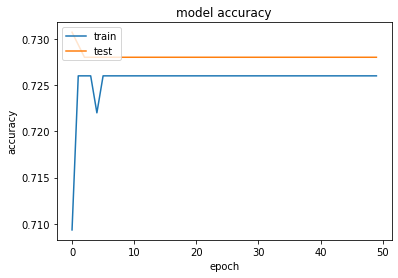

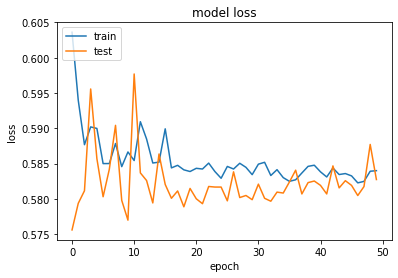

In [45]:
loss_and_accuracy_graph(history)

**Linear + Sgd (momentum)**

In [ ]:
model=neural_network_model(linear_activation,sgd_optimizer)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

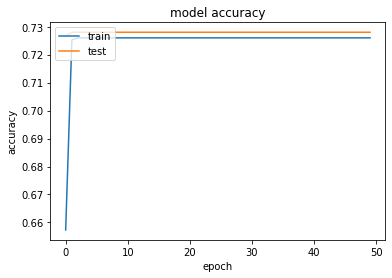

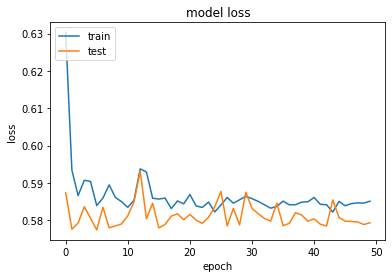

In [47]:
loss_and_accuracy_graph(history)

**ReLu + Adam**


In [ ]:
model=neural_network_model(relu_activation, adam_optimizer)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

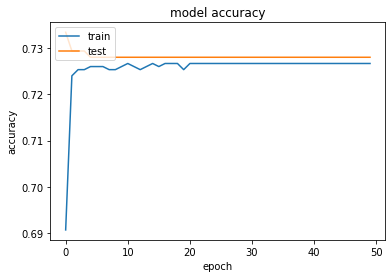

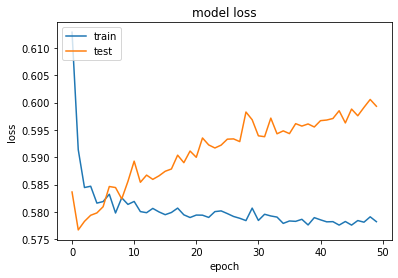

In [49]:
loss_and_accuracy_graph(history)

**Relu + Momentum**

In [ ]:
model=neural_network_model(relu_activation,sgd_optimizer)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

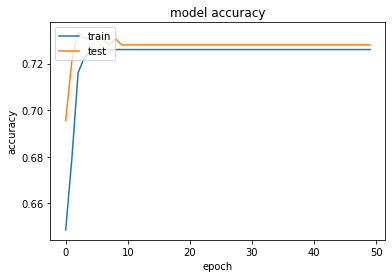

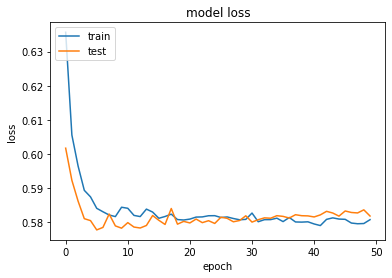

In [51]:
loss_and_accuracy_graph(history)

**Sigmoid + Adam**

In [ ]:
model=neural_network_model(sigmoid_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

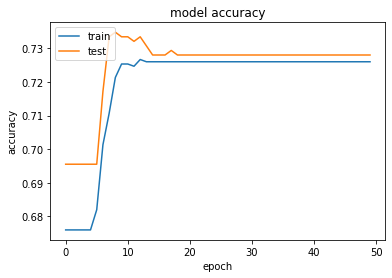

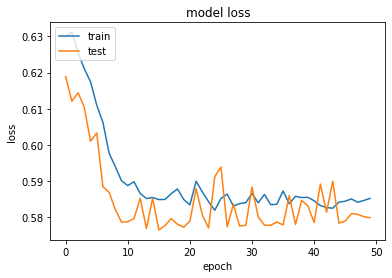

In [53]:
loss_and_accuracy_graph(history)

**Sigmoid + Momentum**

In [ ]:
model=neural_network_model(sigmoid_activation,sgd_optimizer)
history =model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

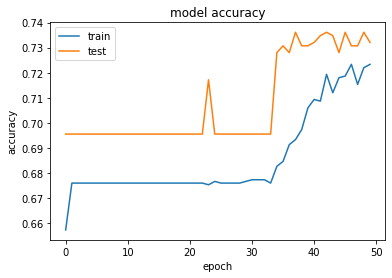

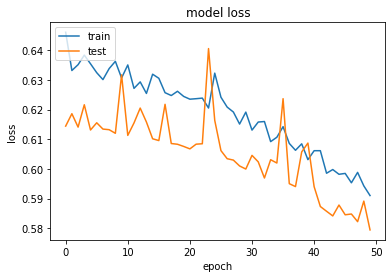

In [55]:
loss_and_accuracy_graph(history)

**Part 2**

Pick the BEST model based on the lowest Cross-Entropy Loss. [My prediction is that it will be ReLU, ADAM], then re-run, but varying the following (10+10 = 20 models)

**Linear + Adam**

In [ ]:
model=neural_network_model_with_ten_layers(linear_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

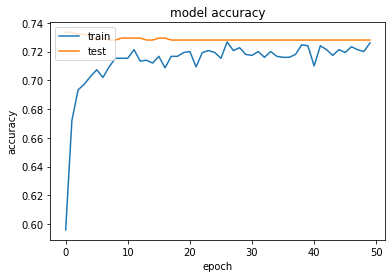

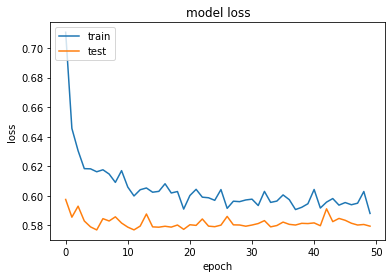

In [57]:
loss_and_accuracy_graph(history)

**Linear + Momentum**

In [ ]:
model=neural_network_model_with_ten_layers(linear_activation, sgd_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

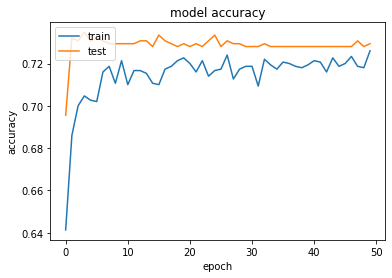

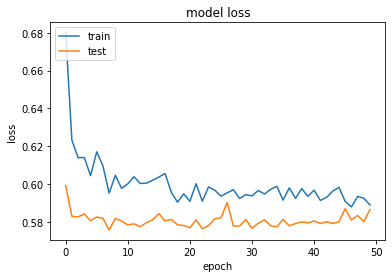

In [59]:
loss_and_accuracy_graph(history)

**RelU + Adam**

In [ ]:
model=neural_network_model_with_ten_layers(relu_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

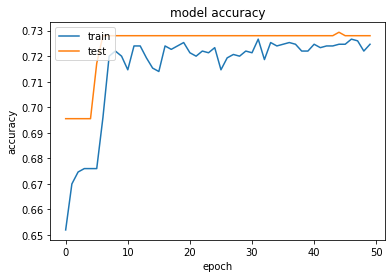

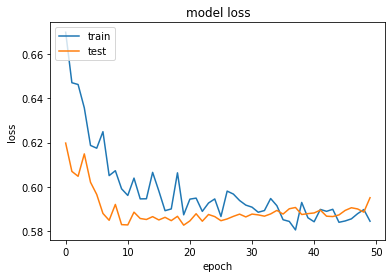

In [61]:
loss_and_accuracy_graph(history)

**RelU + Momentum**

In [ ]:
model=neural_network_model_with_ten_layers(relu_activation,sgd_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

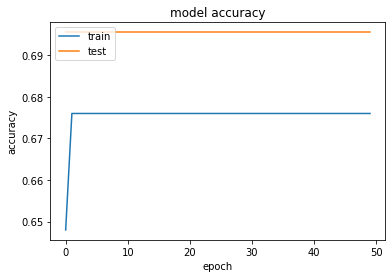

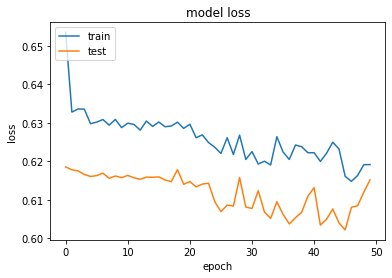

In [63]:
loss_and_accuracy_graph(history)

**Sigmoid + Adam**

In [ ]:
model=neural_network_model_with_ten_layers(sigmoid_activation,adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

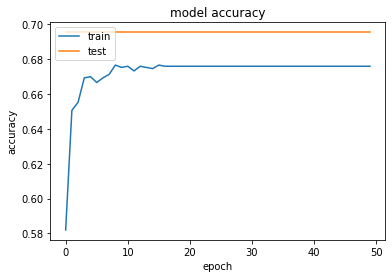

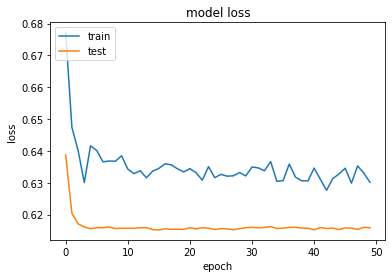

In [65]:
loss_and_accuracy_graph(history)

In [ ]:
model=neural_network_model_with_ten_layers(sigmoid_activation,sgd_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

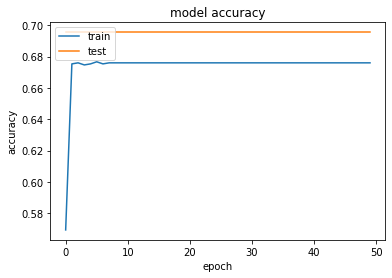

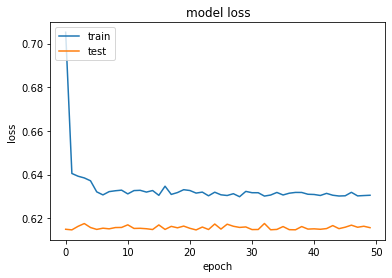

In [67]:
loss_and_accuracy_graph(history)

**Part 3**

Pick the BEST model based on lowest Cross-Entropy Loss, then rerun with those layers, but varying the following (4 * 3 = 12 models

**1.Regularization**

In [113]:
model=best_model_extended(relu_activation,adam_optimizer)


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

In [ ]:
#loss function calling

**2.Early stopping (after 2, 5 & 10 training epochs)**

In [118]:
def early_stopping_decay(params):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=params)
  return early_stopping   

In [ ]:
from keras.callbacks import EarlyStopping
decay_epoch =2

early_stopping=early_stopping_decay(decay_epoch)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=early_stopping)

In [ ]:
decay_epoch =5

early_stopping=early_stopping_decay(decay_epoch)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=early_stopping)

In [ ]:
decay_epoch =10

early_stopping=early_stopping_decay(decay_epoch)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=early_stopping)

# **Add something "fancy"**
1. Attention-based transformer (not sure how to do this...just see if you can do it following the specifications for the homework).

# **Visualization**
1. Plot bar charts for loss functions associated with each categorical choice above (e.g., DropOut vs. DropConnect vs. ShakeOut vs. Linear vs. ReLU vs. Sigmoid, etc.)
2. Plot line charts for loss functions associated with ordinal choice above (e.g., layers 1-10 of constant size per layer; and 1-10 of constant size across all layers; 3 levels of early stopping)